<a href="https://colab.research.google.com/github/Gilmaralexandre/Data-Science-Begginer/blob/main/Fundamentos_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br><br>

### Considere o dataset abaixo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



In [ ]:
#exercicio 01

In [ ]:
#dividindo o dataset em treino e teste
def treino_teste(df, seed=None):
    treino= int(input('digite o numero percentual dos dados de treino',))
    teste = int(input('digite o numero percentual dos dados de teste',))

    perm = np.random.permutation(df.index)
    m = len(df.index) #df.shape[0]
    train_end = int(treino * m/100)
    test_end = int(teste * m/100) 
    treino = df.iloc[perm[:train_end]]
    teste = df.iloc[perm[:test_end]]
    
    return treino, teste

In [ ]:
treino, teste= treino_teste(df)
 
treino


digite o numero percentual dos dados de treino75
digite o numero percentual dos dados de teste25


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1757,3.0,19.766736,51.692159,6.0,39
1636,4.0,6.709475,19.283189,1.0,133
162,3.0,1.739495,55.021410,5.0,247
1558,5.0,20.777455,83.757673,8.0,203
50,4.0,27.595346,89.350213,2.0,244
...,...,...,...,...,...
497,5.0,10.237222,68.085572,1.0,367
1253,2.0,0.359757,32.350790,7.0,64
8,4.0,9.558897,57.056682,1.0,309
1161,3.0,32.235627,82.971517,10.0,52


In [ ]:
teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1757,3.0,19.766736,51.692159,6.0,39
1636,4.0,6.709475,19.283189,1.0,133
162,3.0,1.739495,55.021410,5.0,247
1558,5.0,20.777455,83.757673,8.0,203
50,4.0,27.595346,89.350213,2.0,244
...,...,...,...,...,...
456,4.0,20.989859,79.691552,1.0,286
2092,3.0,17.113944,97.720724,3.0,402
1140,5.0,2.377812,36.680749,5.0,207
1712,1.0,32.129900,78.950697,7.0,64


In [ ]:
#exercicio 02
treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1757,3.0,19.766736,51.692159,6.0,39
1636,4.0,6.709475,19.283189,1.0,133
162,3.0,1.739495,55.021410,5.0,247
1558,5.0,20.777455,83.757673,8.0,203
50,4.0,27.595346,89.350213,2.0,244
...,...,...,...,...,...
497,5.0,10.237222,68.085572,1.0,367
1253,2.0,0.359757,32.350790,7.0,64
8,4.0,9.558897,57.056682,1.0,309
1161,3.0,32.235627,82.971517,10.0,52


In [ ]:
#vendo a correlação com a variável resposta
treino.corr()['crimes']

ind_pop_cid    0.074493
perc_pol      -0.378639
taxa_crim      0.581309
nivel_ed      -0.208617
crimes         1.000000
Name: crimes, dtype: float64

In [ ]:
#fatiando o dataset em X,y
Dframe = treino.loc[:,['taxa_crim','crimes']]
Dframe

,taxa_crim,crimes
1757,51.692159,39
1636,19.283189,133
162,55.021410,247
1558,83.757673,203
50,89.350213,244
...,...,...
497,68.085572,367
1253,32.350790,64
8,57.056682,309
1161,82.971517,52


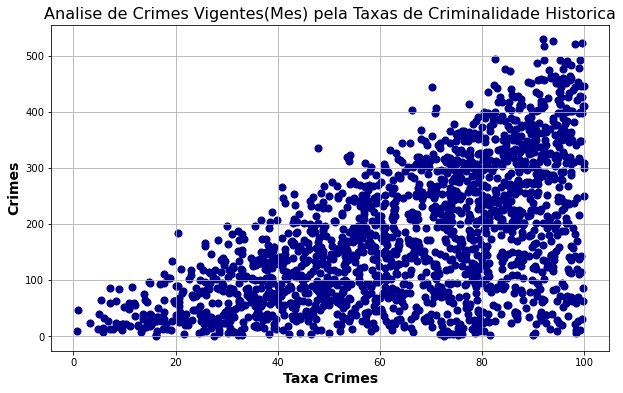

In [ ]:
#plotando o grafico com as variaveis crimes pela taxa crimes
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes) pela Taxas de Criminalidade Historica", fontsize=16)
plt.scatter(Dframe['taxa_crim'],Dframe['crimes'], s=50, c='darkblue')
plt.xlabel('Taxa Crimes',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()

plt.plot()
plt.show()

In [ ]:
x=treino['taxa_crim']
y=treino['crimes']

In [ ]:
#importando o LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
#Instanciando
reg_linear = LinearRegression()

In [ ]:
x = x.values.reshape(-1,1)
type(x), x.shape

(numpy.ndarray, (1845, 1))

In [ ]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (1845, 1))

In [ ]:
#fitando X,y
reg_linear.fit(x,y)

LinearRegression()

In [ ]:
#Realizando a predição com o predict
ypred = reg_linear.predict(x)
ypred

array([[139.34404549],
       [ 42.98070645],
       [149.24308905],
       ...,
       [155.29467308],
       [232.3486503 ],
       [260.98206192]])

In [ ]:
#fazendo a raiz do erro medio quadratico
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
RMSE(y = y, y_pred = ypred)

98.44545341422914

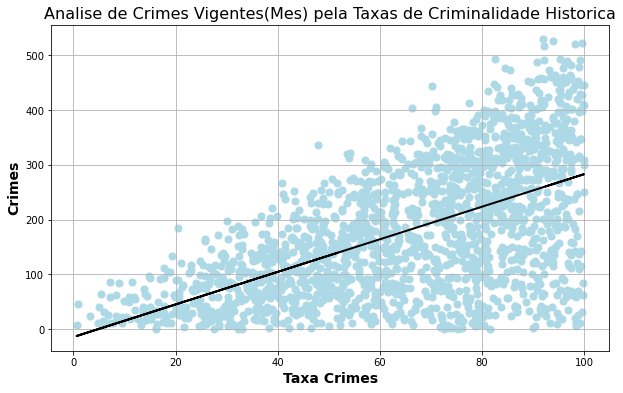

In [ ]:
#Plotando o gráfico com relação das variaveis e a regressão linear
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes) pela Taxas de Criminalidade Historica", fontsize=16)
plt.scatter(Dframe['taxa_crim'],Dframe['crimes'], s=50, c='lightblue')
plt.xlabel('Taxa Crimes',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()
plt.plot(x, ypred, c = 'black', lw = 2)
plt.show()

In [ ]:
reg_linear.intercept_, reg_linear.coef_

(array([-14.35504042]), array([[2.97335398]]))

In [ ]:
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

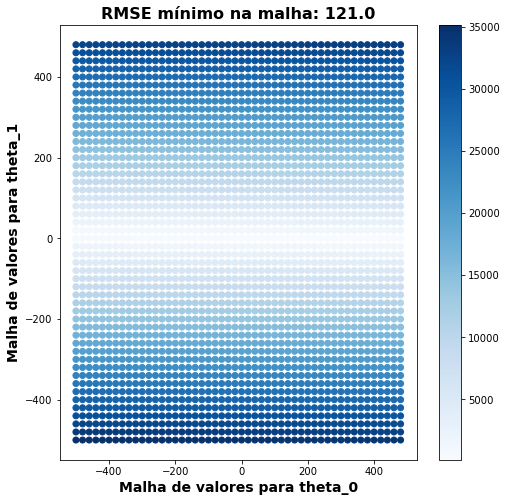

In [ ]:
thetas_0 = np.arange(-500,500,20)
thetas_1 = np.arange(-500,500,20)

grid0, grid1 = np.meshgrid(thetas_0, thetas_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

x = treino['taxa_crim']
y = treino['crimes']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = x, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize=[8,8])
plt.title("RMSE mínimo na malha: " + str(np.round(RMSE_min,2)), fontweight = 'bold', fontsize = 16)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.Blues)
plt.xlabel("Malha de valores para theta_0", fontweight = 'bold', fontsize = 14)
plt.ylabel("Malha de valores para theta_1", fontweight = 'bold', fontsize = 14)
plt.colorbar()
plt.show()

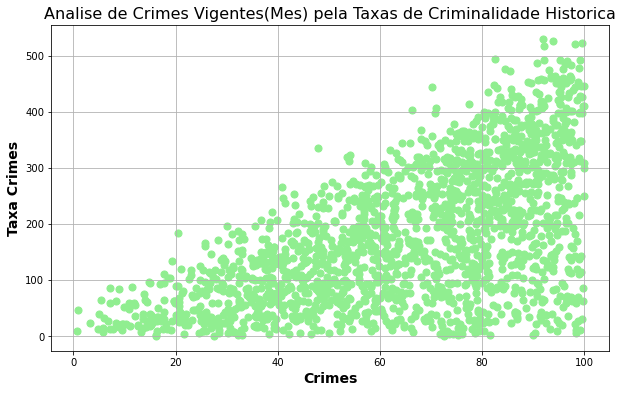

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes) pela Taxas de Criminalidade Historica", fontsize=16)
plt.scatter(Dframe['taxa_crim'],Dframe['crimes'], s=50, c='lightgreen')
plt.xlabel('Crimes',fontweight='bold', fontsize=14)
plt.ylabel('Taxa Crimes', fontweight='bold', fontsize=14)
plt.grid()

plt.plot()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#tabela atualizada
Dframe

,taxa_crim,crimes
1757,51.692159,39
1636,19.283189,133
162,55.021410,247
1558,83.757673,203
50,89.350213,244
...,...,...
497,68.085572,367
1253,32.350790,64
8,57.056682,309
1161,82.971517,52


In [ ]:
x = Dframe.taxa_crim.values
y = Dframe.crimes.values

In [ ]:
y = y.reshape(-1,1)
x = x.reshape(-1,1)
type(x), x.shape

(numpy.ndarray, (1845, 1))

In [ ]:
#Utilizando o modelo knn (KNeighborsRegressor) com 3 vizinhos
knn = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
knn.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.predict(y)

array([[145.66666667],
       [351.33333333],
       [351.33333333],
       ...,
       [351.33333333],
       [153.        ],
       [351.33333333]])

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x, y)
print("RMSE do KNN com 3 vizinhos: ", RMSE(y = y, y_pred = knn.predict(x)))

RMSE do KNN com 3 vizinhos:  80.56937625577042


In [ ]:
for num_vizinhos in range(1,10):
    
    knn = KNeighborsRegressor(n_neighbors = num_vizinhos)
    knn.fit(x, y)
    pred__ = knn.predict(y)[0]
    
    print("Y: ", num_vizinhos, " Resultado: ", pred__)

Y:  1  Resultado:  [122.]
Y:  2  Resultado:  [108.]
Y:  3  Resultado:  [145.66666667]
Y:  4  Resultado:  [145.25]
Y:  5  Resultado:  [146.4]
Y:  6  Resultado:  [128.16666667]
Y:  7  Resultado:  [124.57142857]
Y:  8  Resultado:  [116.5]
Y:  9  Resultado:  [111.11111111]


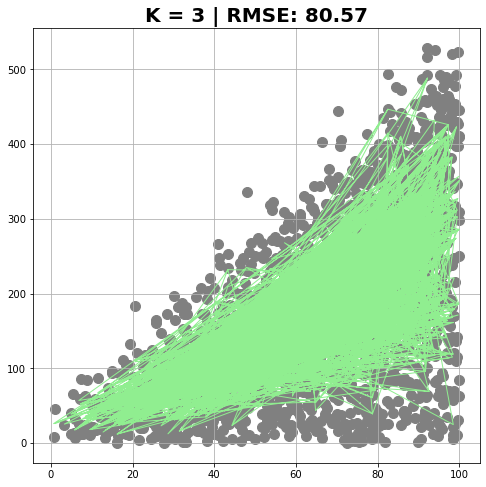

In [ ]:
plt.figure(figsize=[8,8])

knn = KNeighborsRegressor(n_neighbors = 3).fit(x, y)
rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(x)), 2)
plt.title("K = 3 | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
plt.plot(x, knn.predict(x), c = 'lightgreen', lw = 1)
plt.scatter(Dframe['taxa_crim'], Dframe['crimes'], s = 100, c = 'gray')
plt.grid()

plt.show()

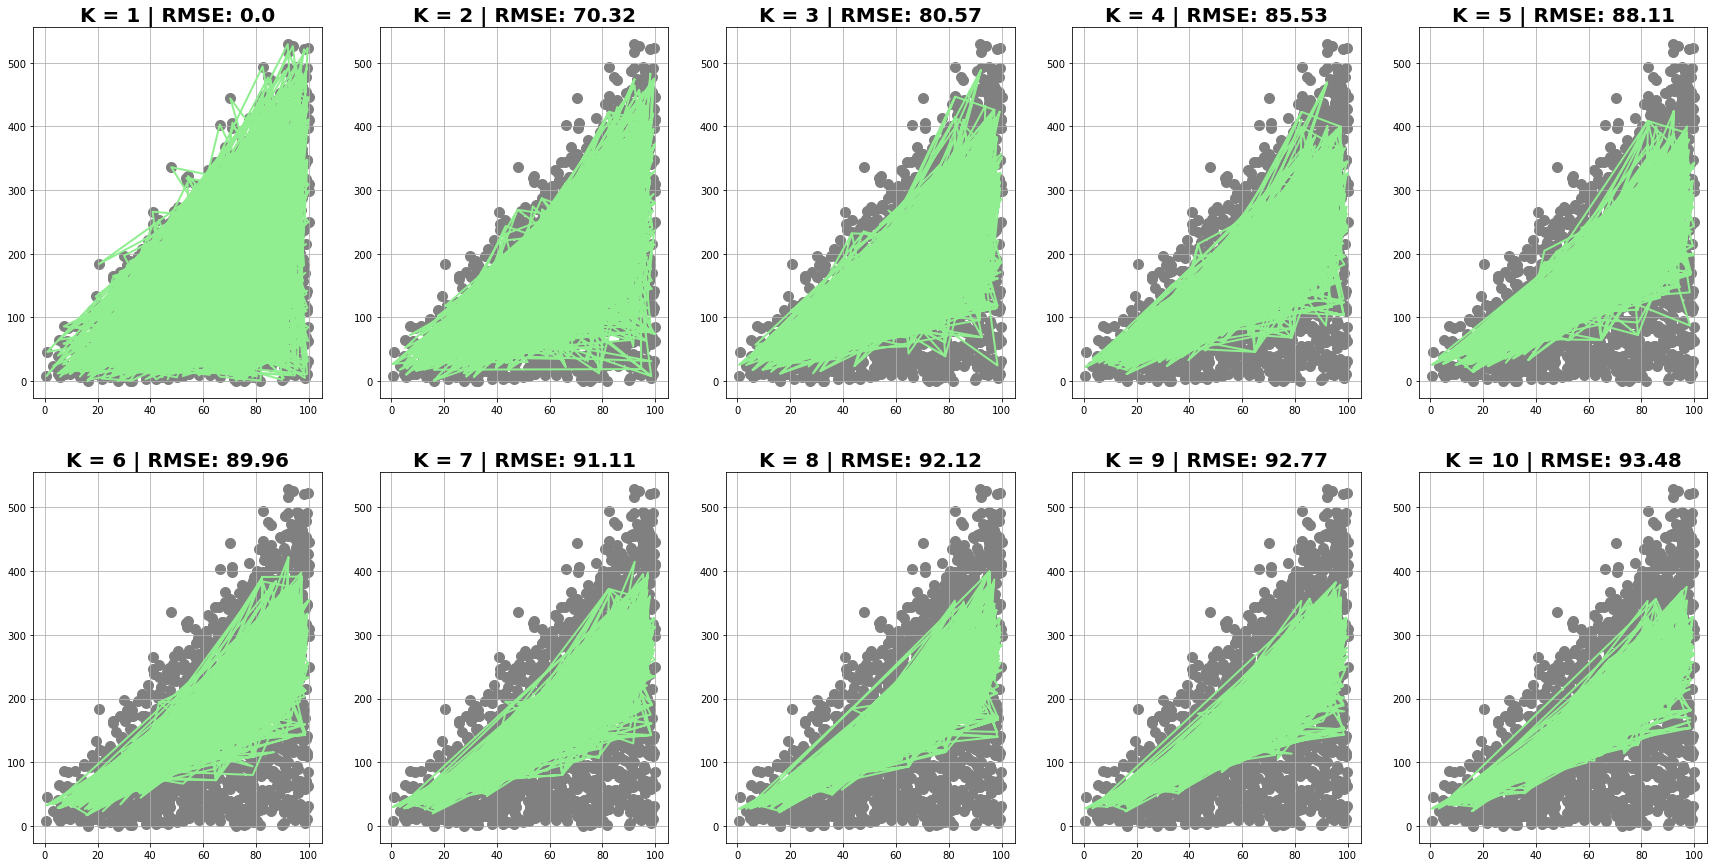

In [ ]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(x, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(x)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(x, knn.predict(x), c = 'lightgreen', lw = 2)
    plt.scatter(Dframe['taxa_crim'], Dframe['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

In [ ]:
teste

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1757,3.0,19.766736,51.692159,6.0,39
1636,4.0,6.709475,19.283189,1.0,133
162,3.0,1.739495,55.021410,5.0,247
1558,5.0,20.777455,83.757673,8.0,203
50,4.0,27.595346,89.350213,2.0,244
...,...,...,...,...,...
456,4.0,20.989859,79.691552,1.0,286
2092,3.0,17.113944,97.720724,3.0,402
1140,5.0,2.377812,36.680749,5.0,207
1712,1.0,32.129900,78.950697,7.0,64


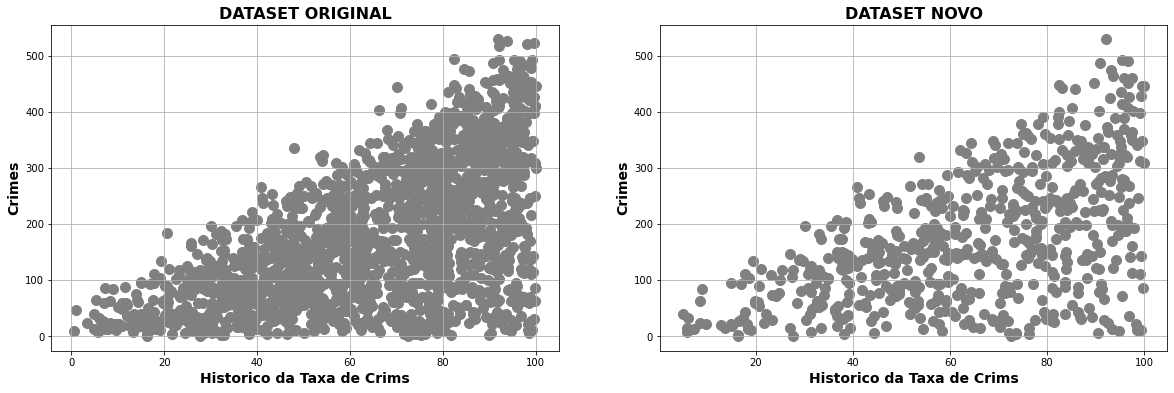

In [ ]:
#Realizando a comparação do primeiro dataset com o segundo
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("DATASET ORIGINAL", fontsize = 16, fontweight = 'bold')
plt.scatter(treino['taxa_crim'], treino['crimes'], s = 100, c = 'gray')
plt.grid()
plt.xlabel("Historico da Taxa de Crims", fontsize = 14, fontweight = 'bold')
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold')
plt.subplot(1,2,2)
plt.title("DATASET NOVO", fontsize = 16, fontweight = 'bold')
plt.scatter(teste['taxa_crim'], teste['crimes'], s = 100, c = 'gray')
plt.xlabel("Historico da Taxa de Crims", fontsize = 14, fontweight = 'bold')
plt.ylabel("Crimes", fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

In [ ]:
#função gerada para tentar analisar a curva de regressão entre os modelos
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 100)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 100)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [ ]:
X = treino['taxa_crim'].values.reshape(-1,1)
y = treino['crimes'].values
Xnovo = teste['taxa_crim'].values.reshape(-1,1)
ynovo = teste['crimes'].values

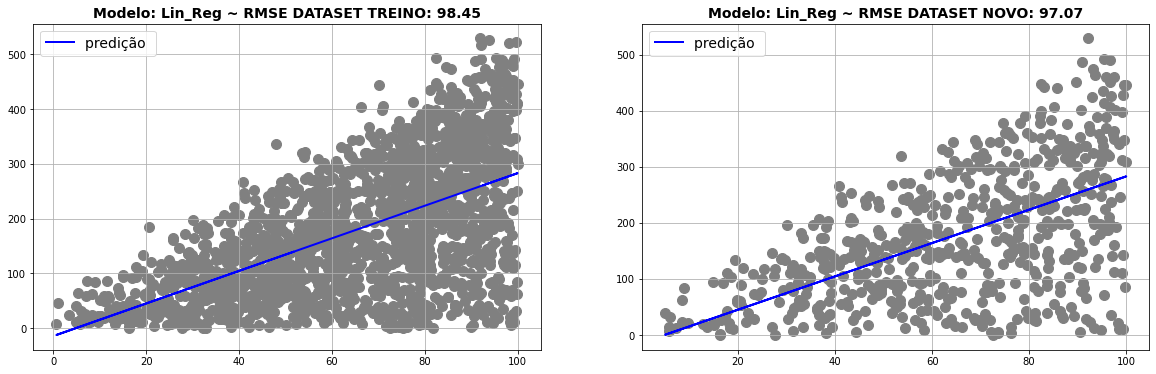

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

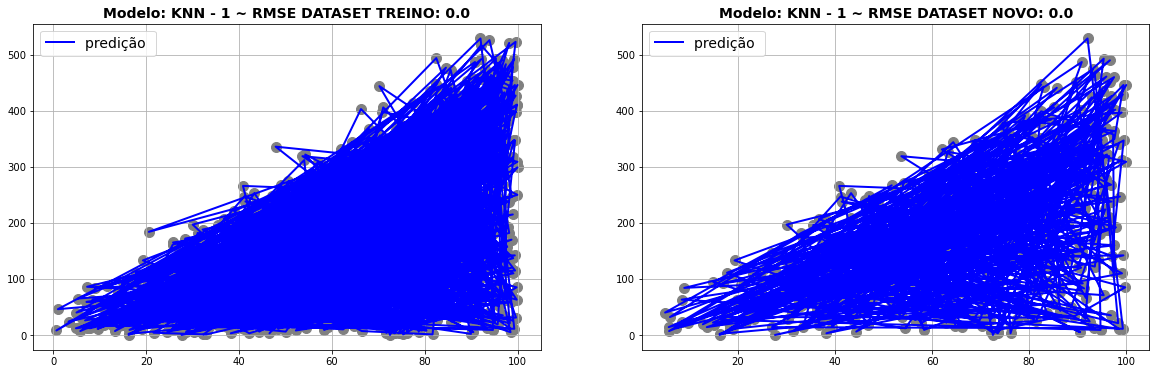

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

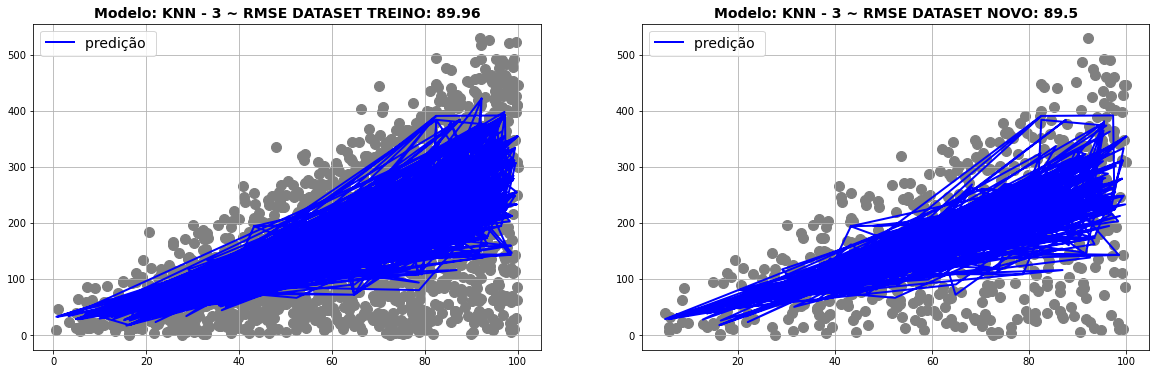

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 3'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

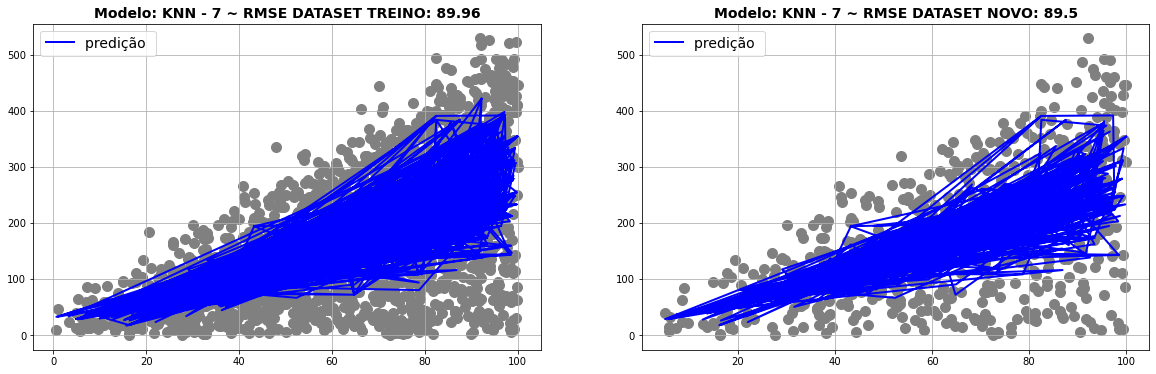

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 7'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

In [ ]:
treino

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1757,3.0,19.766736,51.692159,6.0,39
1636,4.0,6.709475,19.283189,1.0,133
162,3.0,1.739495,55.021410,5.0,247
1558,5.0,20.777455,83.757673,8.0,203
50,4.0,27.595346,89.350213,2.0,244
...,...,...,...,...,...
497,5.0,10.237222,68.085572,1.0,367
1253,2.0,0.359757,32.350790,7.0,64
8,4.0,9.558897,57.056682,1.0,309
1161,3.0,32.235627,82.971517,10.0,52


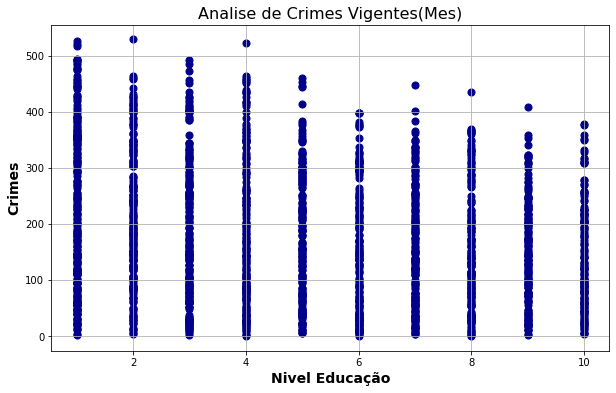

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes)", fontsize=16)
plt.scatter(treino['nivel_ed'],treino['crimes'], s=50, c='darkblue')
plt.xlabel('Nivel Educação',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()

plt.plot()
plt.show()

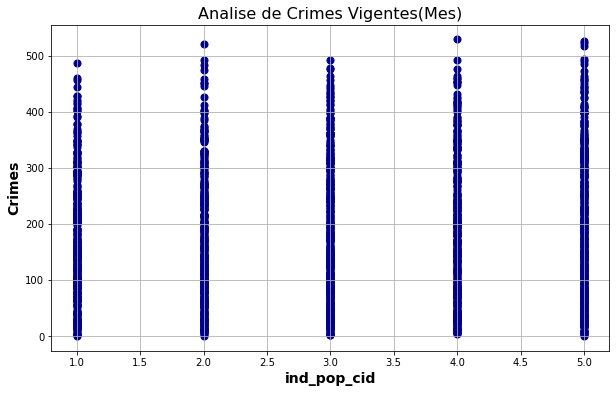

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes)", fontsize=16)
plt.scatter(treino['ind_pop_cid'],treino['crimes'], s=50, c='darkblue')
plt.xlabel('ind_pop_cid',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()

plt.plot()
plt.show()

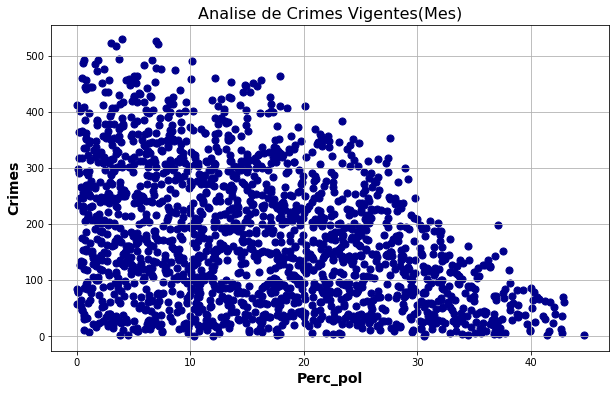

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes)", fontsize=16)
plt.scatter(treino['perc_pol'],treino['crimes'], s=50, c='darkblue')
plt.xlabel('Perc_pol',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()

plt.plot()
plt.show()

In [ ]:
x=treino['perc_pol']
y=treino['crimes']

In [ ]:
x = x.values.reshape(-1,1)
type(x), x.shape

(numpy.ndarray, (1845, 1))

In [ ]:
y = y.values.reshape(-1,1)
type(y), y.shape

(numpy.ndarray, (1845, 1))

In [ ]:
reg_linear.fit(x,y)

LinearRegression()

In [ ]:
ypred = reg_linear.predict(x)
ypred

array([[161.46134084],
       [218.78859992],
       [240.60905229],
       ...,
       [206.27835339],
       [106.71729447],
       [136.92307447]])

In [ ]:
RMSE(y = y, y_pred = ypred)

111.97933471475162

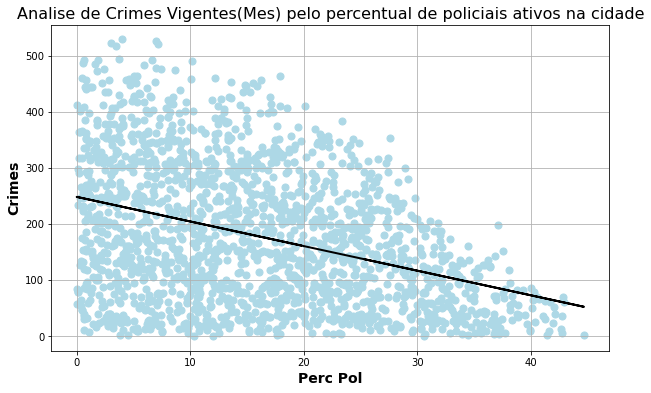

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Analise de Crimes Vigentes(Mes) pelo percentual de policiais ativos na cidade", fontsize=16)
plt.scatter(treino['perc_pol'],treino['crimes'], s=50, c='lightblue')
plt.xlabel('Perc Pol',fontweight='bold', fontsize=14)
plt.ylabel('Crimes', fontweight='bold', fontsize=14)
plt.grid()
plt.plot(x, ypred, c = 'black', lw = 2)
plt.show()

In [ ]:
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

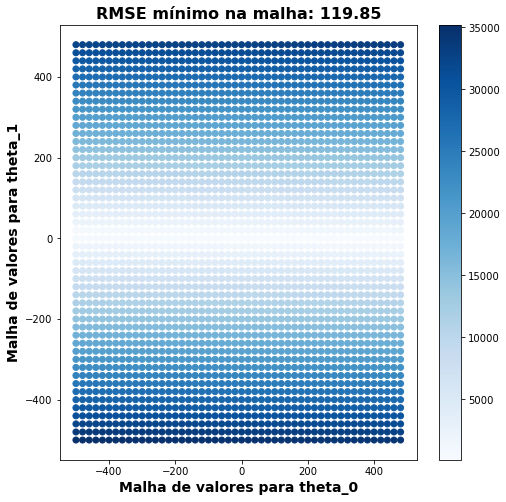

In [ ]:
thetas_0 = np.arange(-500,500,20)
thetas_1 = np.arange(-500,500,20)

grid0, grid1 = np.meshgrid(thetas_0, thetas_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

x = df['taxa_crim']
y = df['crimes']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = x, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize=[8,8])
plt.title("RMSE mínimo na malha: " + str(np.round(RMSE_min,2)), fontweight = 'bold', fontsize = 16)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.Blues)
plt.xlabel("Malha de valores para theta_0", fontweight = 'bold', fontsize = 14)
plt.ylabel("Malha de valores para theta_1", fontweight = 'bold', fontsize = 14)
plt.colorbar()
plt.show()

In [ ]:
x = treino.perc_pol.values
y = treino.crimes.values

In [ ]:
y = y.reshape(-1,1)
x = x.reshape(-1,1)
type(x), x.shape

(numpy.ndarray, (1845, 1))

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
knn.fit(x,y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn.predict(y)

array([[42.        ],
       [44.33333333],
       [44.33333333],
       ...,
       [44.33333333],
       [44.33333333],
       [44.33333333]])

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x, y)
print("RMSE do KNN com 3 vizinhos: ", RMSE(y = y, y_pred = knn.predict(x)))

RMSE do KNN com 3 vizinhos:  91.55326121260265


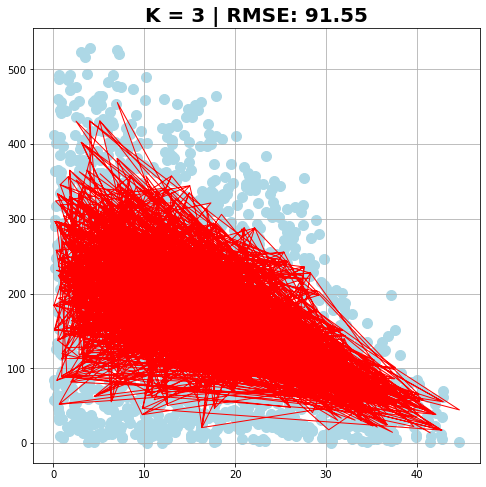

In [ ]:
plt.figure(figsize=[8,8])

knn = KNeighborsRegressor(n_neighbors = 3).fit(x, y)
rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(x)), 2)
plt.title("K = 3 | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
plt.plot(x, knn.predict(x), c = 'red', lw = 1)
plt.scatter(treino['perc_pol'], treino['crimes'], s = 100, c = 'lightblue')
plt.grid()

plt.show()

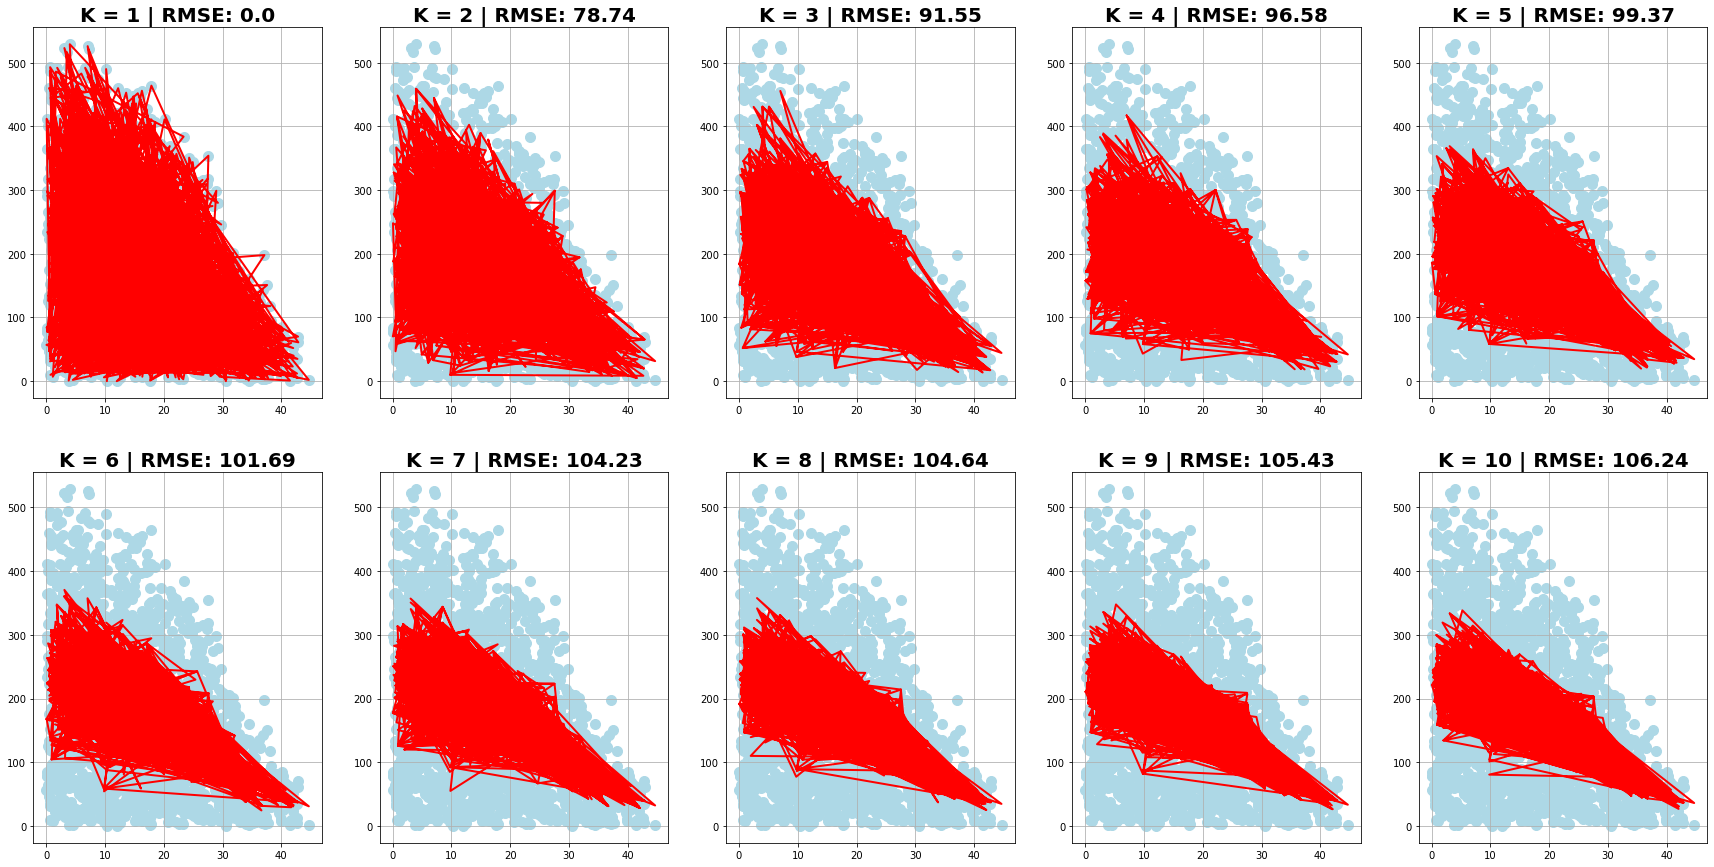

In [ ]:
plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors = i).fit(x, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(x)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(x, knn.predict(x), c = 'red', lw = 2)
    plt.scatter(treino['perc_pol'], treino['crimes'], s = 100, c = 'lightblue')
    plt.grid()

plt.show()

In [ ]:
X = treino['perc_pol'].values.reshape(-1,1)
y = treino['crimes'].values
Xnovo = teste['perc_pol'].values.reshape(-1,1)
ynovo = teste['crimes'].values

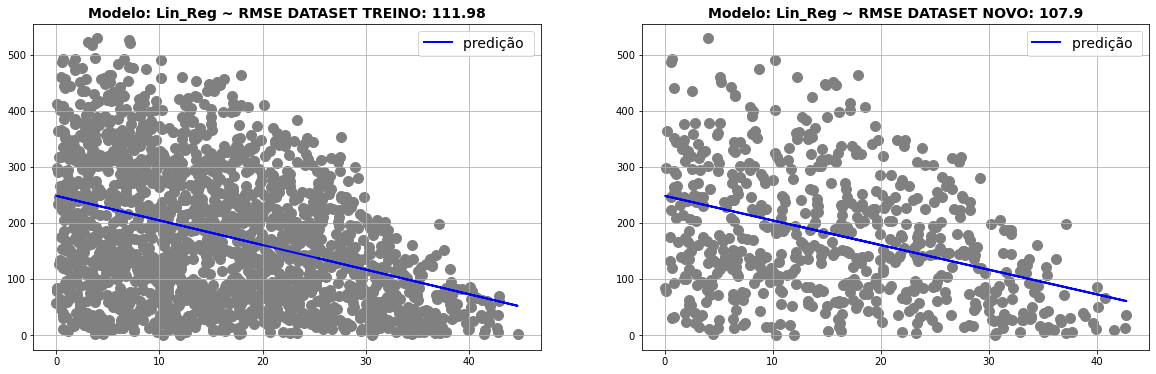

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

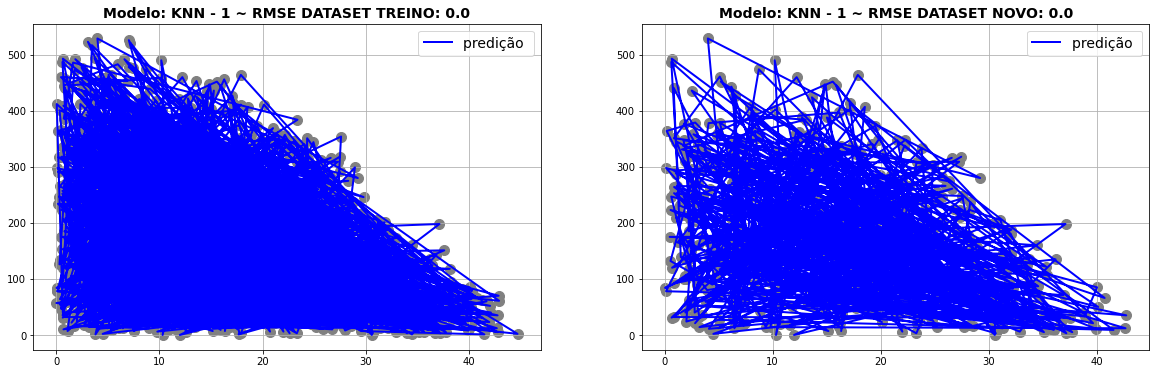

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 1)
nome_modelo = 'KNN - 1'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

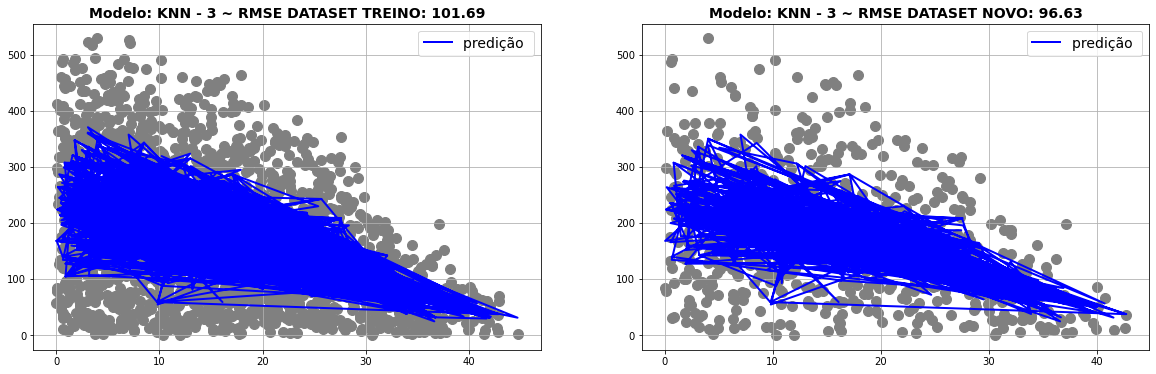

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 3'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)

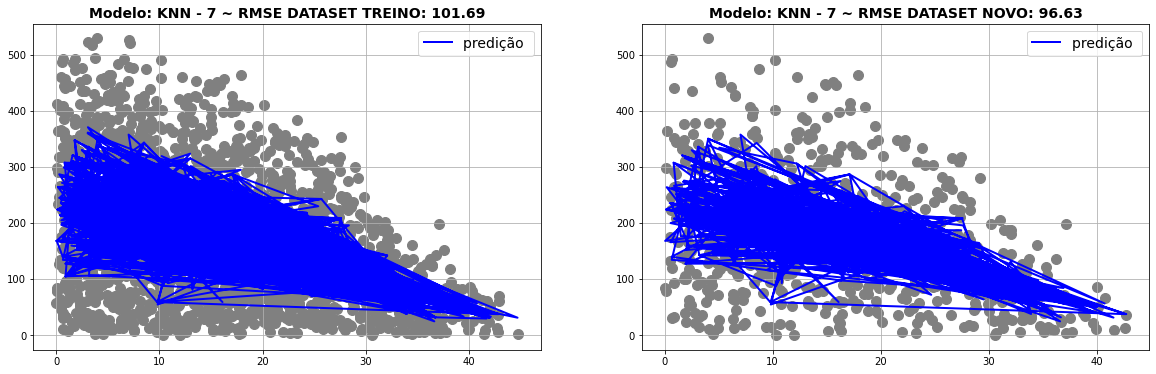

In [ ]:
modelo = KNeighborsRegressor(n_neighbors = 6)
nome_modelo = 'KNN - 7'
plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo)